## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">CAPSTONE PROJECT : NLP - CHATBOT INTERFACE

## <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Domain: Industrial safety. NLP based Chatbot

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Context:
<font color=darkblue>
The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.
</font> 

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Data Description:
<font color=darkblue>
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Column Information:
<font color=darkblue>
<b>Data :</b>timestamp or time/date information
<br><b>Countries :</b>which country the accident occurred (anonymised)
<br><b>Local :</b>the city where the manufacturing plant is located (anonymised)
<br><b>Industry sector :</b>which sector the plant belongs to
<br><b>Accident level :</b>from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
<br><b>Potential Accident Level :</b>Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)
<br><b>Genre :</b>if the person is male of female
<br><b>Employee or Third Party :</b>if the injured person is an employee or a third party
<br><b>Critical Risk :</b>some description of the risk involved in the accident
<br><b>Description :</b>Detailed description of how the accident happened
</font> 

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Objective:
<font color=darkblue>
Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk import tokenize, stem
from nltk.util import ngrams
from wordcloud import WordCloud, STOPWORDS

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Change current working directory to project folder

In [ ]:
file_path = "/content/drive/MyDrive/AIML/Projects/"
#file_path = ""
zip_file = "archive.zip"


### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Extract the zip file :
<font color=darkblue>
Extract Aligned Face Dataset from Pinterest.zip
<ul>
</ul>
</font>

In [ ]:
from zipfile import ZipFile
with ZipFile(file_path + zip_file, 'r') as zip:
  zip.extractall()

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Load Dataset :
<font color=darkblue>
</font>

In [2]:
df_accidents = pd.read_csv("IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")

In [3]:
df_accidents.shape

(425, 11)

In [4]:
df_accidents.head(10)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
5,5,2016-01-12 00:00:00,Country_02,Local_05,Metals,I,III,Male,Third Party (Remote),Pressurized Systems,During the unloading operation of the ustulado...
6,6,2016-01-16 00:00:00,Country_02,Local_05,Metals,I,III,Male,Employee,Fall prevention (same level),The collaborator reports that he was on street...
7,7,2016-01-17 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Pressed,"At approximately 04:50 p.m., when the mechanic..."
8,8,2016-01-19 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Third Party (Remote),Others,Employee was sitting in the resting area at le...
9,9,2016-01-26 00:00:00,Country_01,Local_06,Metals,I,II,Male,Third Party,Chemical substances,At the moment the forklift operator went to ma...


### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Data Cleansing :
<font color=darkblue>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Checking presence of Missing Values :
<font color=darkblue>
</font>

In [5]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


In [6]:
df_accidents.isna().sum()

Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Drop Column :
<font color=darkblue>
</font>

In [7]:
df_accidents.drop('Unnamed: 0', axis=1, inplace=True)

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Rename Columns :
<font color=darkblue>
</font>

In [8]:
df_accidents.rename(columns={'Data':'Date', 'Countries':'Country', 'Local':'Locality', 'Genre':'Gender', 
                             'Employee or Third Party':'Employee Type', 'Critical Risk':'Risk Type'}, inplace=True)

In [9]:
df_accidents.head()

,Date,Country,Locality,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Risk Type,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Unique Check :
<font color=darkblue>
</font>

In [10]:
df_accidents.nunique()

Date                        287
Country                       3
Locality                     12
Industry Sector               3
Accident Level                5
Potential Accident Level      6
Gender                        2
Employee Type                 3
Risk Type                    33
Description                 411
dtype: int64

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Data Preprocessing :
<font color=darkblue>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Add Columns on Date attribute :
<font color=darkblue>
</font>

In [11]:
df_accidents['Date'] = pd.to_datetime(df_accidents['Date'])
df_accidents['Year'] = df_accidents['Date'].apply(lambda x : x.year)
df_accidents['Month'] = df_accidents['Date'].apply(lambda x : x.month)
df_accidents['Day'] = df_accidents['Date'].apply(lambda x : x.day)
df_accidents['Weekday'] = df_accidents['Date'].apply(lambda x : x.day_name())
df_accidents['WeekofYear'] = df_accidents['Date'].apply(lambda x : x.weekofyear)
df_accidents['MonthName'] = df_accidents['Date'].apply(lambda x : x.month_name())

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Add Column on Season of year :
<font color=darkblue>
<ui>
<li><b>Winter :</b> December, January, February</li>
<li><b>Spring :</b> March, April, May</li>
<li><b>Summer :</b> June, July, August</li>
<li><b>Autumn :</b> September, October, November</li>
</font>

In [12]:
def seasonofyear(x):
    if x in [12, 1, 2]:
        season = 'Winter'
    elif x in [3, 4, 5]:
        season = 'Spring'
    elif x in [6, 7, 8]:
        season = 'Summer'
    elif x in [9, 10, 11]:
        season = 'Autumn'
    return season

df_accidents['Season'] = df_accidents['Month'].apply(seasonofyear)

In [13]:
df_accidents.head()

,Date,Country,Locality,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Risk Type,Description,Year,Month,Day,Weekday,WeekofYear,MonthName,Season
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,January,Winter
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,January,Winter
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,January,Winter
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1,January,Winter
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1,January,Winter


In [14]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      425 non-null    datetime64[ns]
 1   Country                   425 non-null    object        
 2   Locality                  425 non-null    object        
 3   Industry Sector           425 non-null    object        
 4   Accident Level            425 non-null    object        
 5   Potential Accident Level  425 non-null    object        
 6   Gender                    425 non-null    object        
 7   Employee Type             425 non-null    object        
 8   Risk Type                 425 non-null    object        
 9   Description               425 non-null    object        
 10  Year                      425 non-null    int64         
 11  Month                     425 non-null    int64         
 12  Day                   

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">EDA :
<font color=darkblue>
</font>

In [15]:
# function for distribution, frequency plot
def UnivariatePlot(aCol):
    aBar = df_accidents[aCol]
    aSeries = df_accidents.groupby(aCol)['Accident Level'].count()
    aLabel = aSeries.keys()  #df_accidents[aCol]
    aUnique = df_accidents[aCol].nunique()
    
    plt.figure(figsize=(18,6))
    
    # bar char showing count
    plt.subplot(1, 2, 1)
    plt.title(aCol + ' Count', fontsize=14)
    plt.xlabel(aCol, fontsize=13)
    plt.ylabel('Total number of Accidents', fontsize=13)
    ax = sns.countplot(aBar, data=df_accidents)
    plt.tick_params(labelsize=13)
    plt.xticks(rotation=45)
    
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


    # pie chart showing percentage
    plt.subplot(1, 2, 2)
    plt.title(aCol + ' Percentage', fontsize=14)
    plt.pie(aSeries, autopct="%1.1f%%", explode=[0.04]*aUnique, labels=aLabel, pctdistance=0.5, 
            shadow=True, startangle=90)
    plt.axis('equal')

    plt.show()


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Country :
<font color=darkblue>
</font>

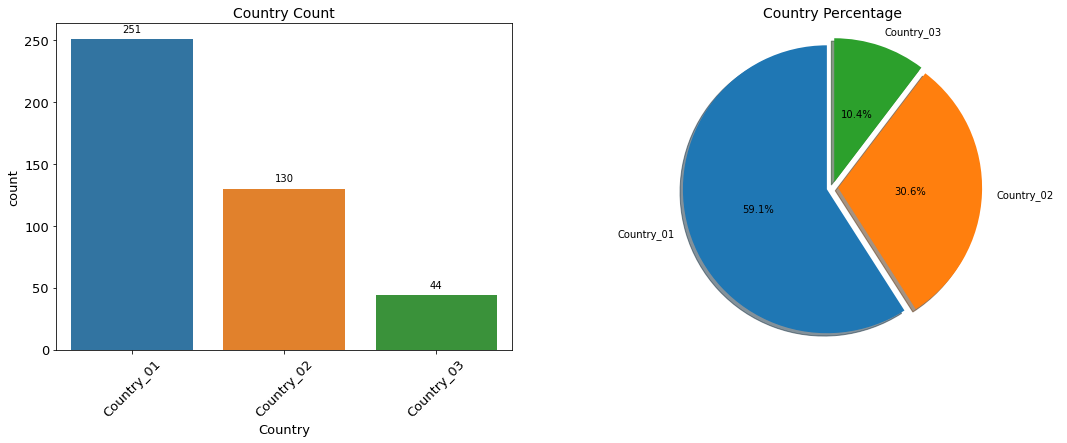

In [16]:
# plot on Country column
UnivariatePlot('Country')


##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
    <li>Country_01 recorded the highest (59.1%) number of accidents. This is not necessarily significant as the employees in Country_01 could be more than other two Countries</li>
    <li>Country_03 recorded the lowest (10.4%) number of accidents</li>
</ul>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Gender :
<font color=darkblue>
</font>

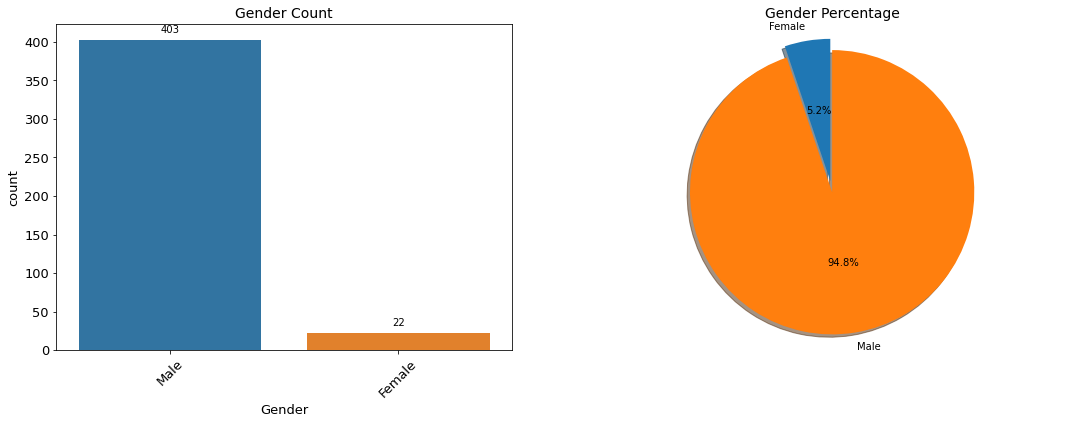

In [17]:
# plot on Gender column
UnivariatePlot('Gender')

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
    <li>Male Gender recorded 94.8% of accidents compared to Female Gender with 5.2%</li>
    <li>With no gender ratio of overall employees, this may not be significant. Could be number of Male employees are mouch more than Female employees</li>
</ul>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Critical Risk :
<font color=darkblue>
</font>

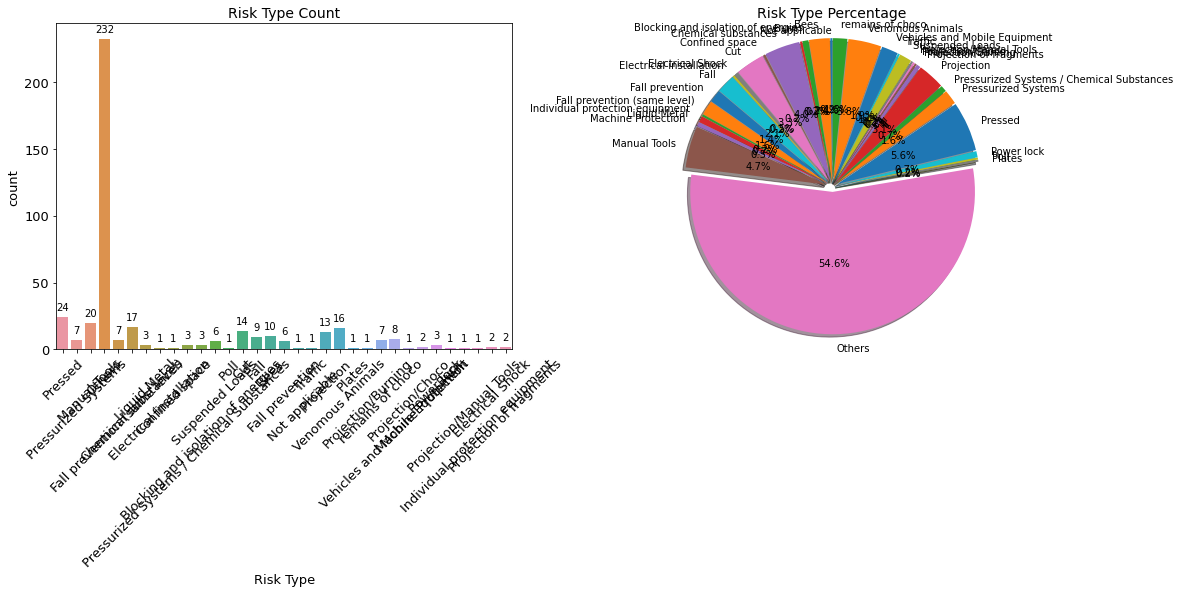

In [18]:
# plot on Employee Type column
UnivariatePlot('Risk Type')

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
    <li>54.6% of the accidents fall in Others category of Critical Risk</li>
    <li>This could be due to limitations on valid options on data input/collection</li>
</ul>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Employee Type :
<font color=darkblue>
</font>

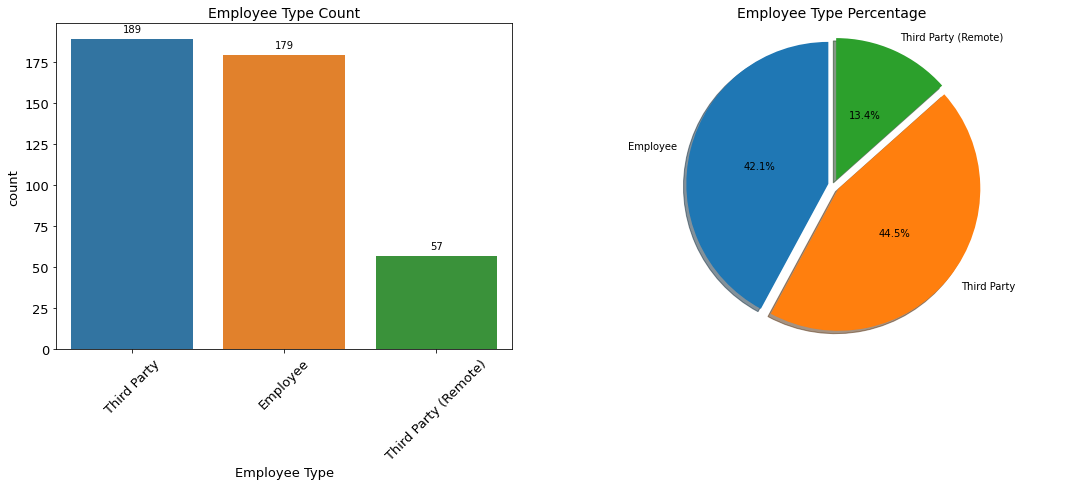

In [19]:
# plot on Employee Type column
UnivariatePlot('Employee Type')

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
    <li>Third Party (44.5%) and Employee (42.1%) are prone to overall 87% of accidents</li>
    <li>Third Party (Remote) record 13,4% of accidents</li>
</ul>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Local :
<font color=darkblue>
</font>

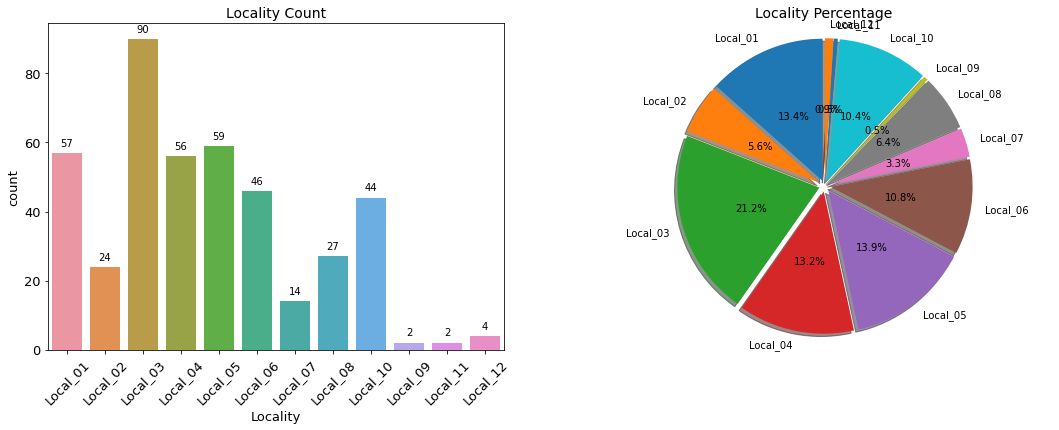

In [20]:
# plot on Local column
UnivariatePlot('Locality')

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
    <li>Of the 12 Localities(cities), 3 localities (Local_09, Local_11 and Local_12) record very low accidents compared to other Localities.</li>
    <li>Could be these Localities have highly safe workspace. Or there could be lesser number of employees in these localities</li>
    <li>Possibility of no proper reporting of accidents in these Localities</li>
</ul>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Industry Sector :
<font color=darkblue>
</font>

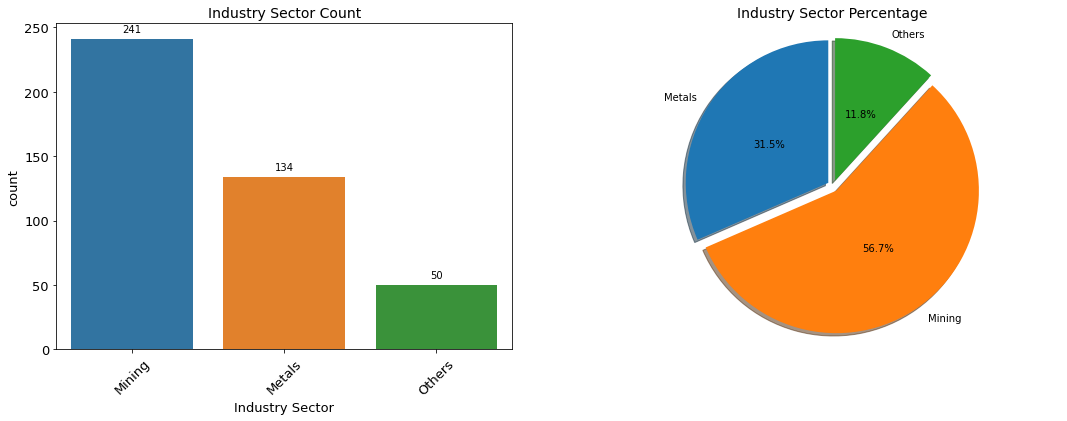

In [21]:
# plot on Industry Sector column
UnivariatePlot('Industry Sector')

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
    <li>Mining (56.7%) and Metals (31.5%) sectors combinedly record 88.2% of total accidents</li>
    <li>Other Sectors report 11.8% of accidents</li>
</ul>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Accident Level :
<font color=darkblue>
</font>

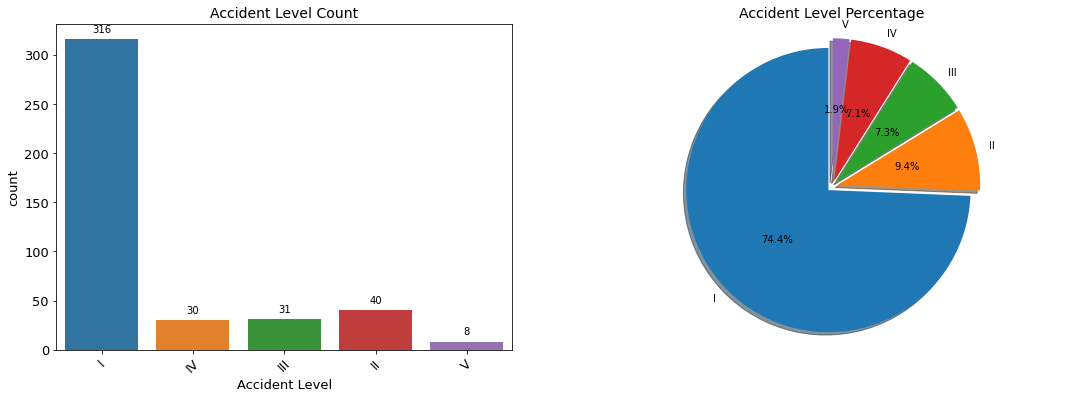

In [22]:
# plot on Accident Level column
UnivariatePlot('Accident Level')

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
    <li>Accident Level categorized to 6 Levels (I to VI), with I as 'not severe' and VI as 'very severe' </li>
    <li>No acidents reported under Level VI</li>
    <li>Level V (8) is reported with least number of accidents</li>
    <li>75% of accidents reported under Level I</li>
</ul>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Potential Accident Level :
<font color=darkblue>
</font>

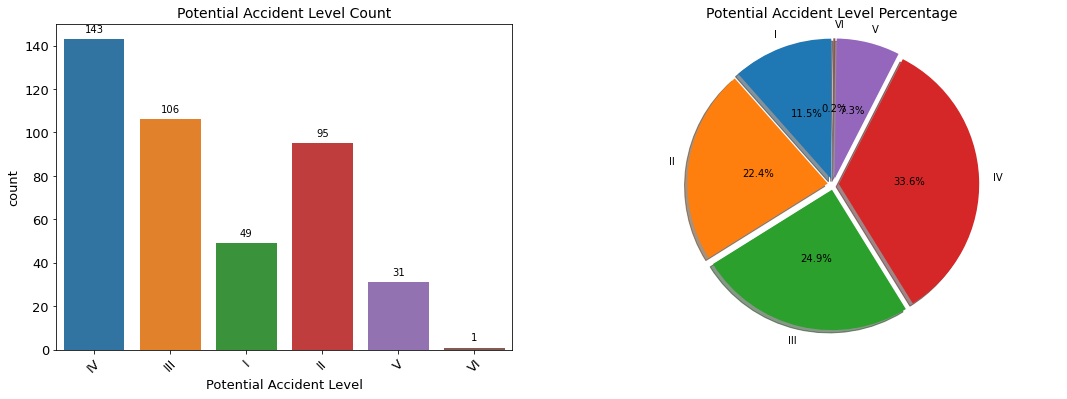

In [23]:
# plot on Potential Accident Level column
UnivariatePlot('Potential Accident Level')

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
    <li>Potential Accident Level categorized to 6 Levels (I to VI), with I as 'not severe' and VI as 'very severe' </li>
    <li>1 accident reported under Level VI</li>
    <li>Level IV (143) is reported with more number of accidents</li>
</ul>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Month :
<font color=darkblue>
</font>

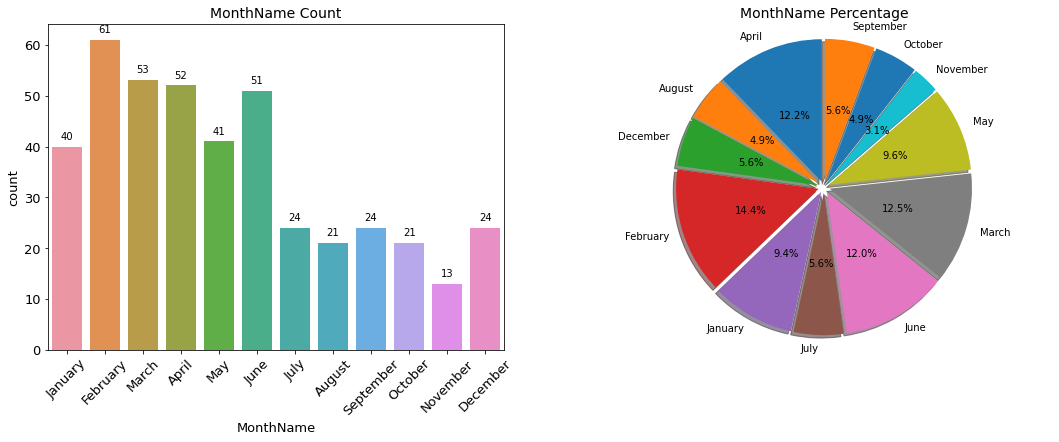

In [24]:
# plot on Month Level column
UnivariatePlot('MonthName')

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
    <li>Months of February, March, April and June record the most accidents</li>
</ul>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Weekday :
<font color=darkblue>
</font>

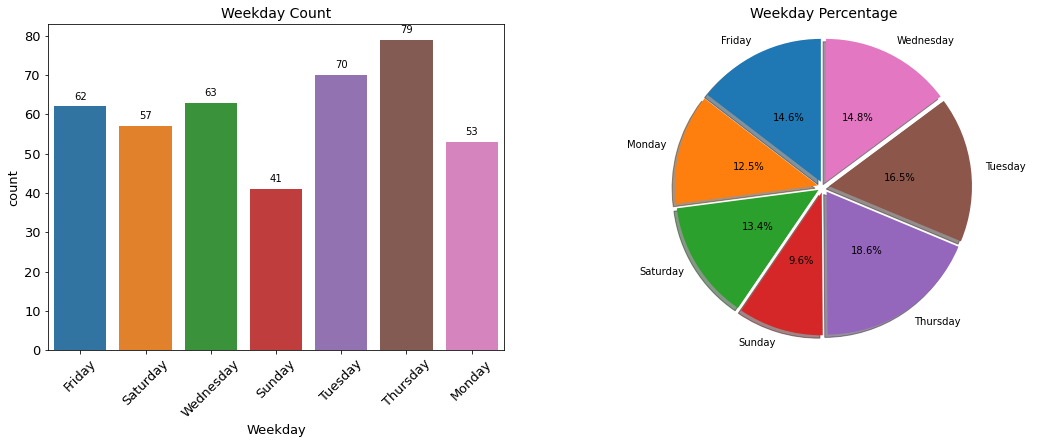

In [25]:
# plot on Week Day Level column
UnivariatePlot('Weekday')

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
    <li>Thursday record the highest number of accidents</li>
</ul>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Season :
<font color=darkblue>
</font>

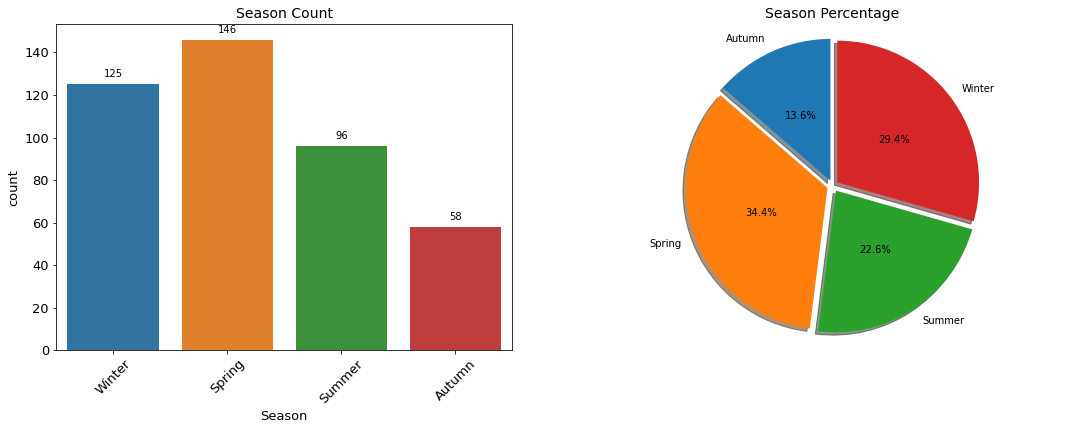

In [26]:
# plot on Season Level column
UnivariatePlot('Season')

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
    <li>Spring season (March, April and May) records highest number of accidents</li>
</ul>
</font>
<br>

In [27]:
# Multivariate analysis on Accident Level/Potential Accident levels
def MultivariatePlot(aCol):
    fig = plt.figure(figsize = (15, 7.2))
    ax = fig.add_subplot(121)
    sns.countplot(x = aCol, data = df_accidents, ax = ax, orient = 'v',
                  hue = 'Accident Level').set_title(aCol.capitalize() +' count plot by Accident Level', 
                                                                      fontsize = 13)
    plt.legend(labels = df_accidents['Accident Level'].unique())
    plt.xticks(rotation = 90)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    ax = fig.add_subplot(122)
    sns.countplot(x = aCol, data = df_accidents, ax = ax, orient = 'v', 
                  hue = 'Potential Accident Level').set_title(aCol.capitalize() +' count plot by Potential Accident Level', 
                                                                      fontsize = 13)
    plt.legend(labels = df_accidents['Potential Accident Level'].unique())
    plt.xticks(rotation = 90)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    return plt.show()


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Country on Accident Level / Potential Accident Level:
<font color=darkblue>
</font>

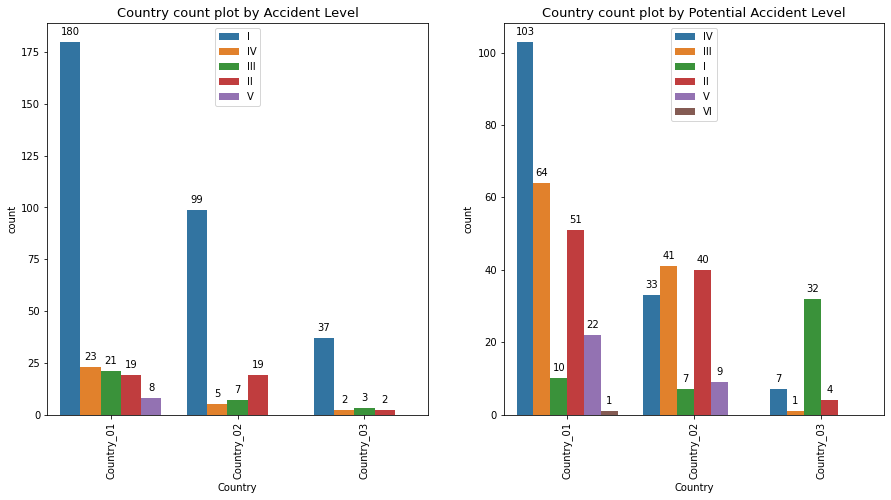

In [28]:
# plot on Country column
MultivariatePlot('Country')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Gender on Accident Level / Potential Accident Level:
<font color=darkblue>
</font>

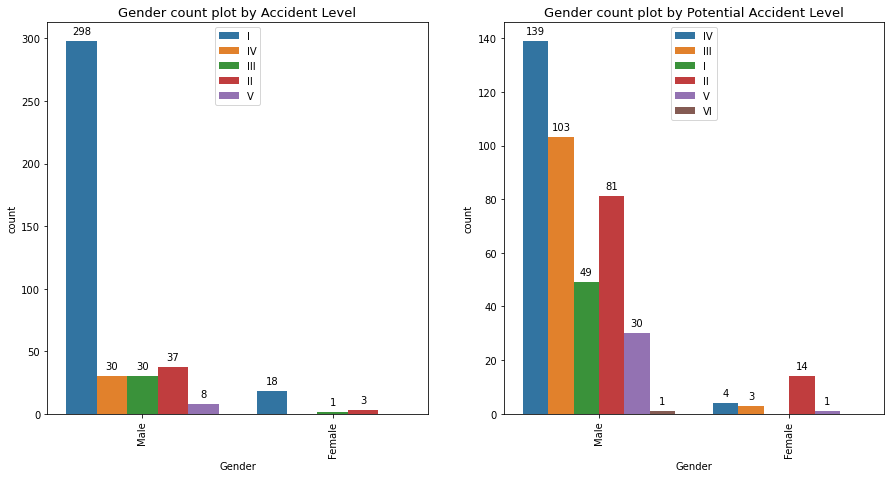

In [29]:
# plot on Gender column
MultivariatePlot('Gender')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Industry Sector on Accident Level / Potential Accident Level:
<font color=darkblue>
</font>

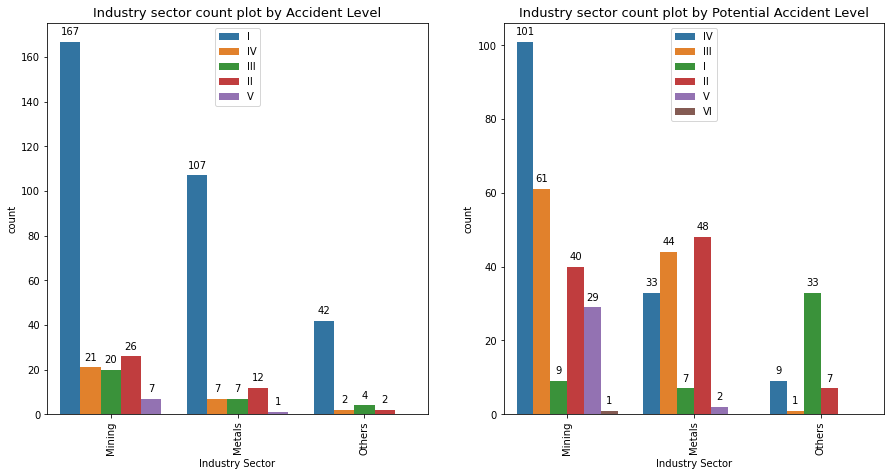

In [30]:
# plot on Industry Sector column
MultivariatePlot('Industry Sector')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Employee Type on Accident Level / Potential Accident Level:
<font color=darkblue>
</font>

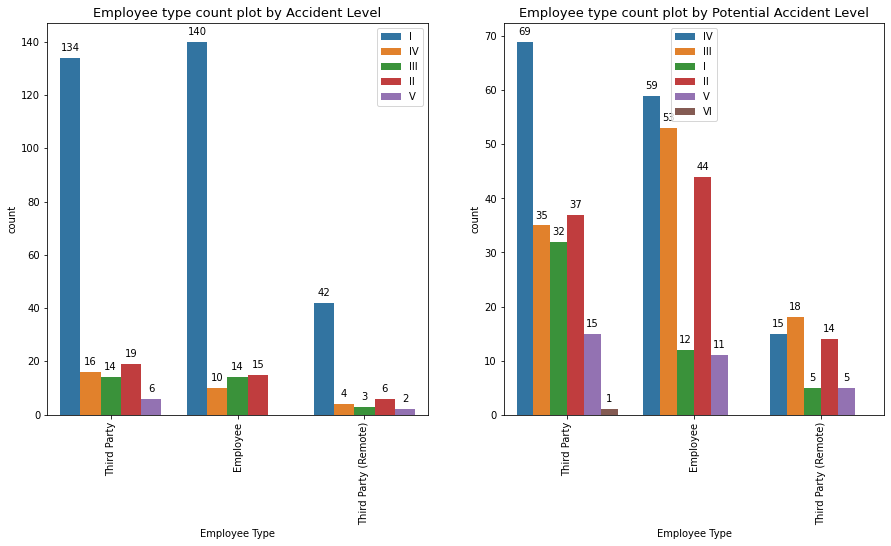

In [31]:
# plot on Employee Type column
MultivariatePlot('Employee Type')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Month on Accident Level / Potential Accident Level:
<font color=darkblue>
</font>

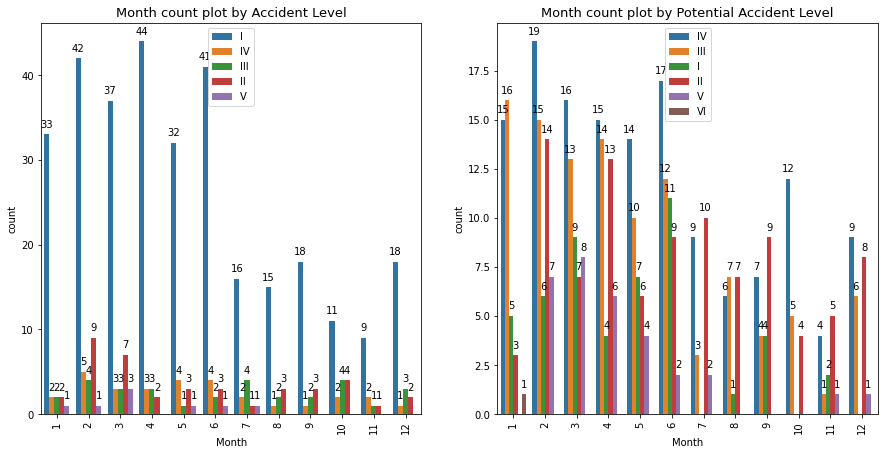

In [32]:
# plot on Month column
MultivariatePlot('Month')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Season on Accident Level / Potential Accident Level:
<font color=darkblue>
</font>

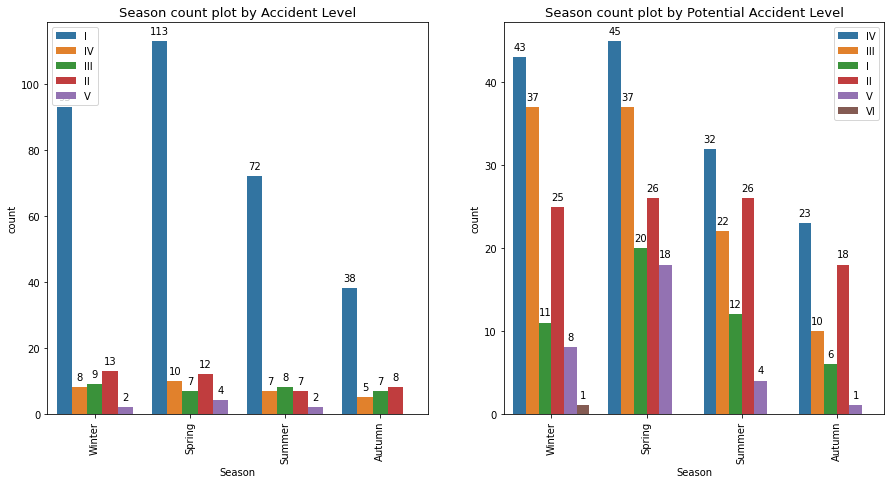

In [33]:
# plot on Season column
MultivariatePlot('Season')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Weekday on Accident Level / Potential Accident Level:
<font color=darkblue>
</font>

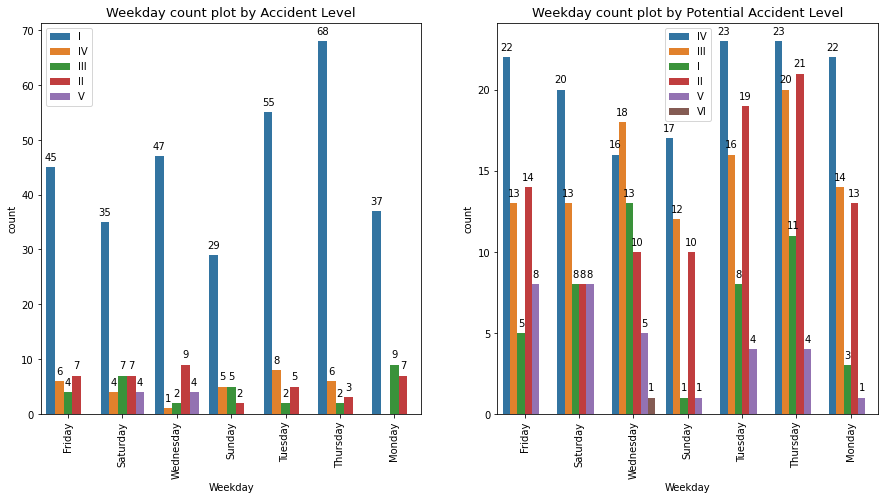

In [34]:
# plot on Weekday column
MultivariatePlot('Weekday')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Country on Employee Type:
<font color=darkblue>
</font>

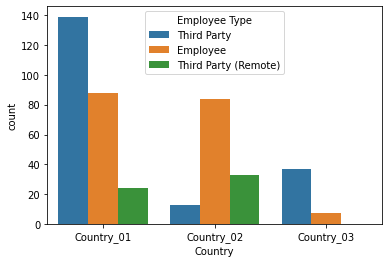

In [35]:
sns.countplot(x="Country", data=df_accidents, hue="Employee Type")

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
    <li>In Country_01 and Country_03, Third Party has high incidents recorded</li>
    <li>In Country_02, Employee has high incidents recorded</li>
</ul>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Country on Industry Sector:
<font color=darkblue>
</font>

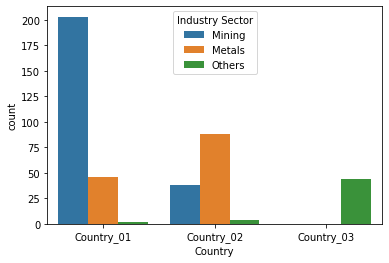

In [36]:
sns.countplot(x="Country", data=df_accidents, hue="Industry Sector")

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
    <li>In Country_01, Mining sector has high incidents recorded</li>
    <li>In Country_02, Metals sector has high incidents recorded</li>
</ul>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Country on Gender:
<font color=darkblue>
</font>

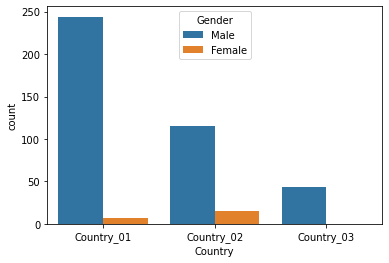

In [37]:
sns.countplot(x="Country", data=df_accidents, hue="Gender")

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
    <li>Across all countries, Male gender has high incidents recorded</li>
</ul>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Employee Type on Gender:
<font color=darkblue>
</font>

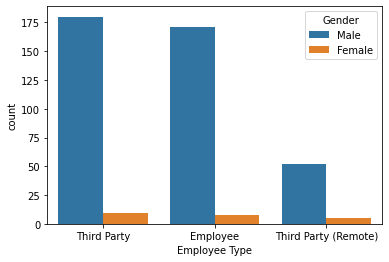

In [38]:
sns.countplot(x="Employee Type", data=df_accidents, hue="Gender")

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
    <li>Across all Employee Type, Male gender has high incidents recorded</li>
</ul>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Label Encoding of Categorical columns:
<font color=darkblue>
</font>

In [39]:
cat_columns_replace = {'Country': {'Country_01': 1, 'Country_02': 2, 'Country_03': 3}, 
                       'Locality': {'Local_01': 1, 'Local_02': 2, 'Local_03': 3, 'Local_04': 4,'Local_05': 5, 
                                 'Local_06': 6, 'Local_07': 7, 'Local_08': 8, 'Local_09': 9, 'Local_10': 10, 
                                 'Local_11': 11, 'Local_12': 12 }, 
                       'Industry Sector': {'Metals': 1, 'Mining': 2, 'Others': 3}, 
                       'Accident Level': {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}, 
                       'Potential Accident Level': {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}, 
                       'Gender': {'Male': 1, 'Female': 0}, 
                       'Employee Type': {'Employee': 1, 'Third Party': 2, 'Third Party (Remote)': 3}, 
                       'Weekday': {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 
                                   'Saturday': 6, 'Sunday': 7}, 
                       'Season': {'Spring': 1, 'Summer': 2, 'Autumn': 3, 'Winter': 4}
                      }

In [40]:
#encode categorical columns
df_accidents_clean = df_accidents.replace(cat_columns_replace)

#to encode Critical Risk column
df_accidents_clean['Risk Type'] = LabelEncoder().fit_transform(df_accidents['Risk Type'])

In [41]:
df_accidents_clean.head(3)

,Date,Country,Locality,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Risk Type,Description,Year,Month,Day,Weekday,WeekofYear,MonthName,Season
0,2016-01-01,1,1,2,1,4,1,2,20,While removing the drill rod of the Jumbo 08 f...,2016,1,1,5,53,January,4
1,2016-01-02,2,2,2,1,4,1,1,21,During the activation of a sodium sulphide pum...,2016,1,2,6,53,January,4
2,2016-01-06,1,3,2,1,3,1,3,15,In the sub-station MILPO located at level +170...,2016,1,6,3,1,January,4


In [42]:
df_accidents_plot = df_accidents_clean.drop(labels=['Date','Description', 'Year', 'WeekofYear', 'MonthName'], 
                                            axis=1)

In [43]:
df_accidents_plot.shape

(425, 12)

In [44]:
df_accidents_plot.head(3)

,Country,Locality,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Risk Type,Month,Day,Weekday,Season
0,1,1,2,1,4,1,2,20,1,1,5,4
1,2,2,2,1,4,1,1,21,1,2,6,4
2,1,3,2,1,3,1,3,15,1,6,3,4


<Figure size 720x480 with 0 Axes>

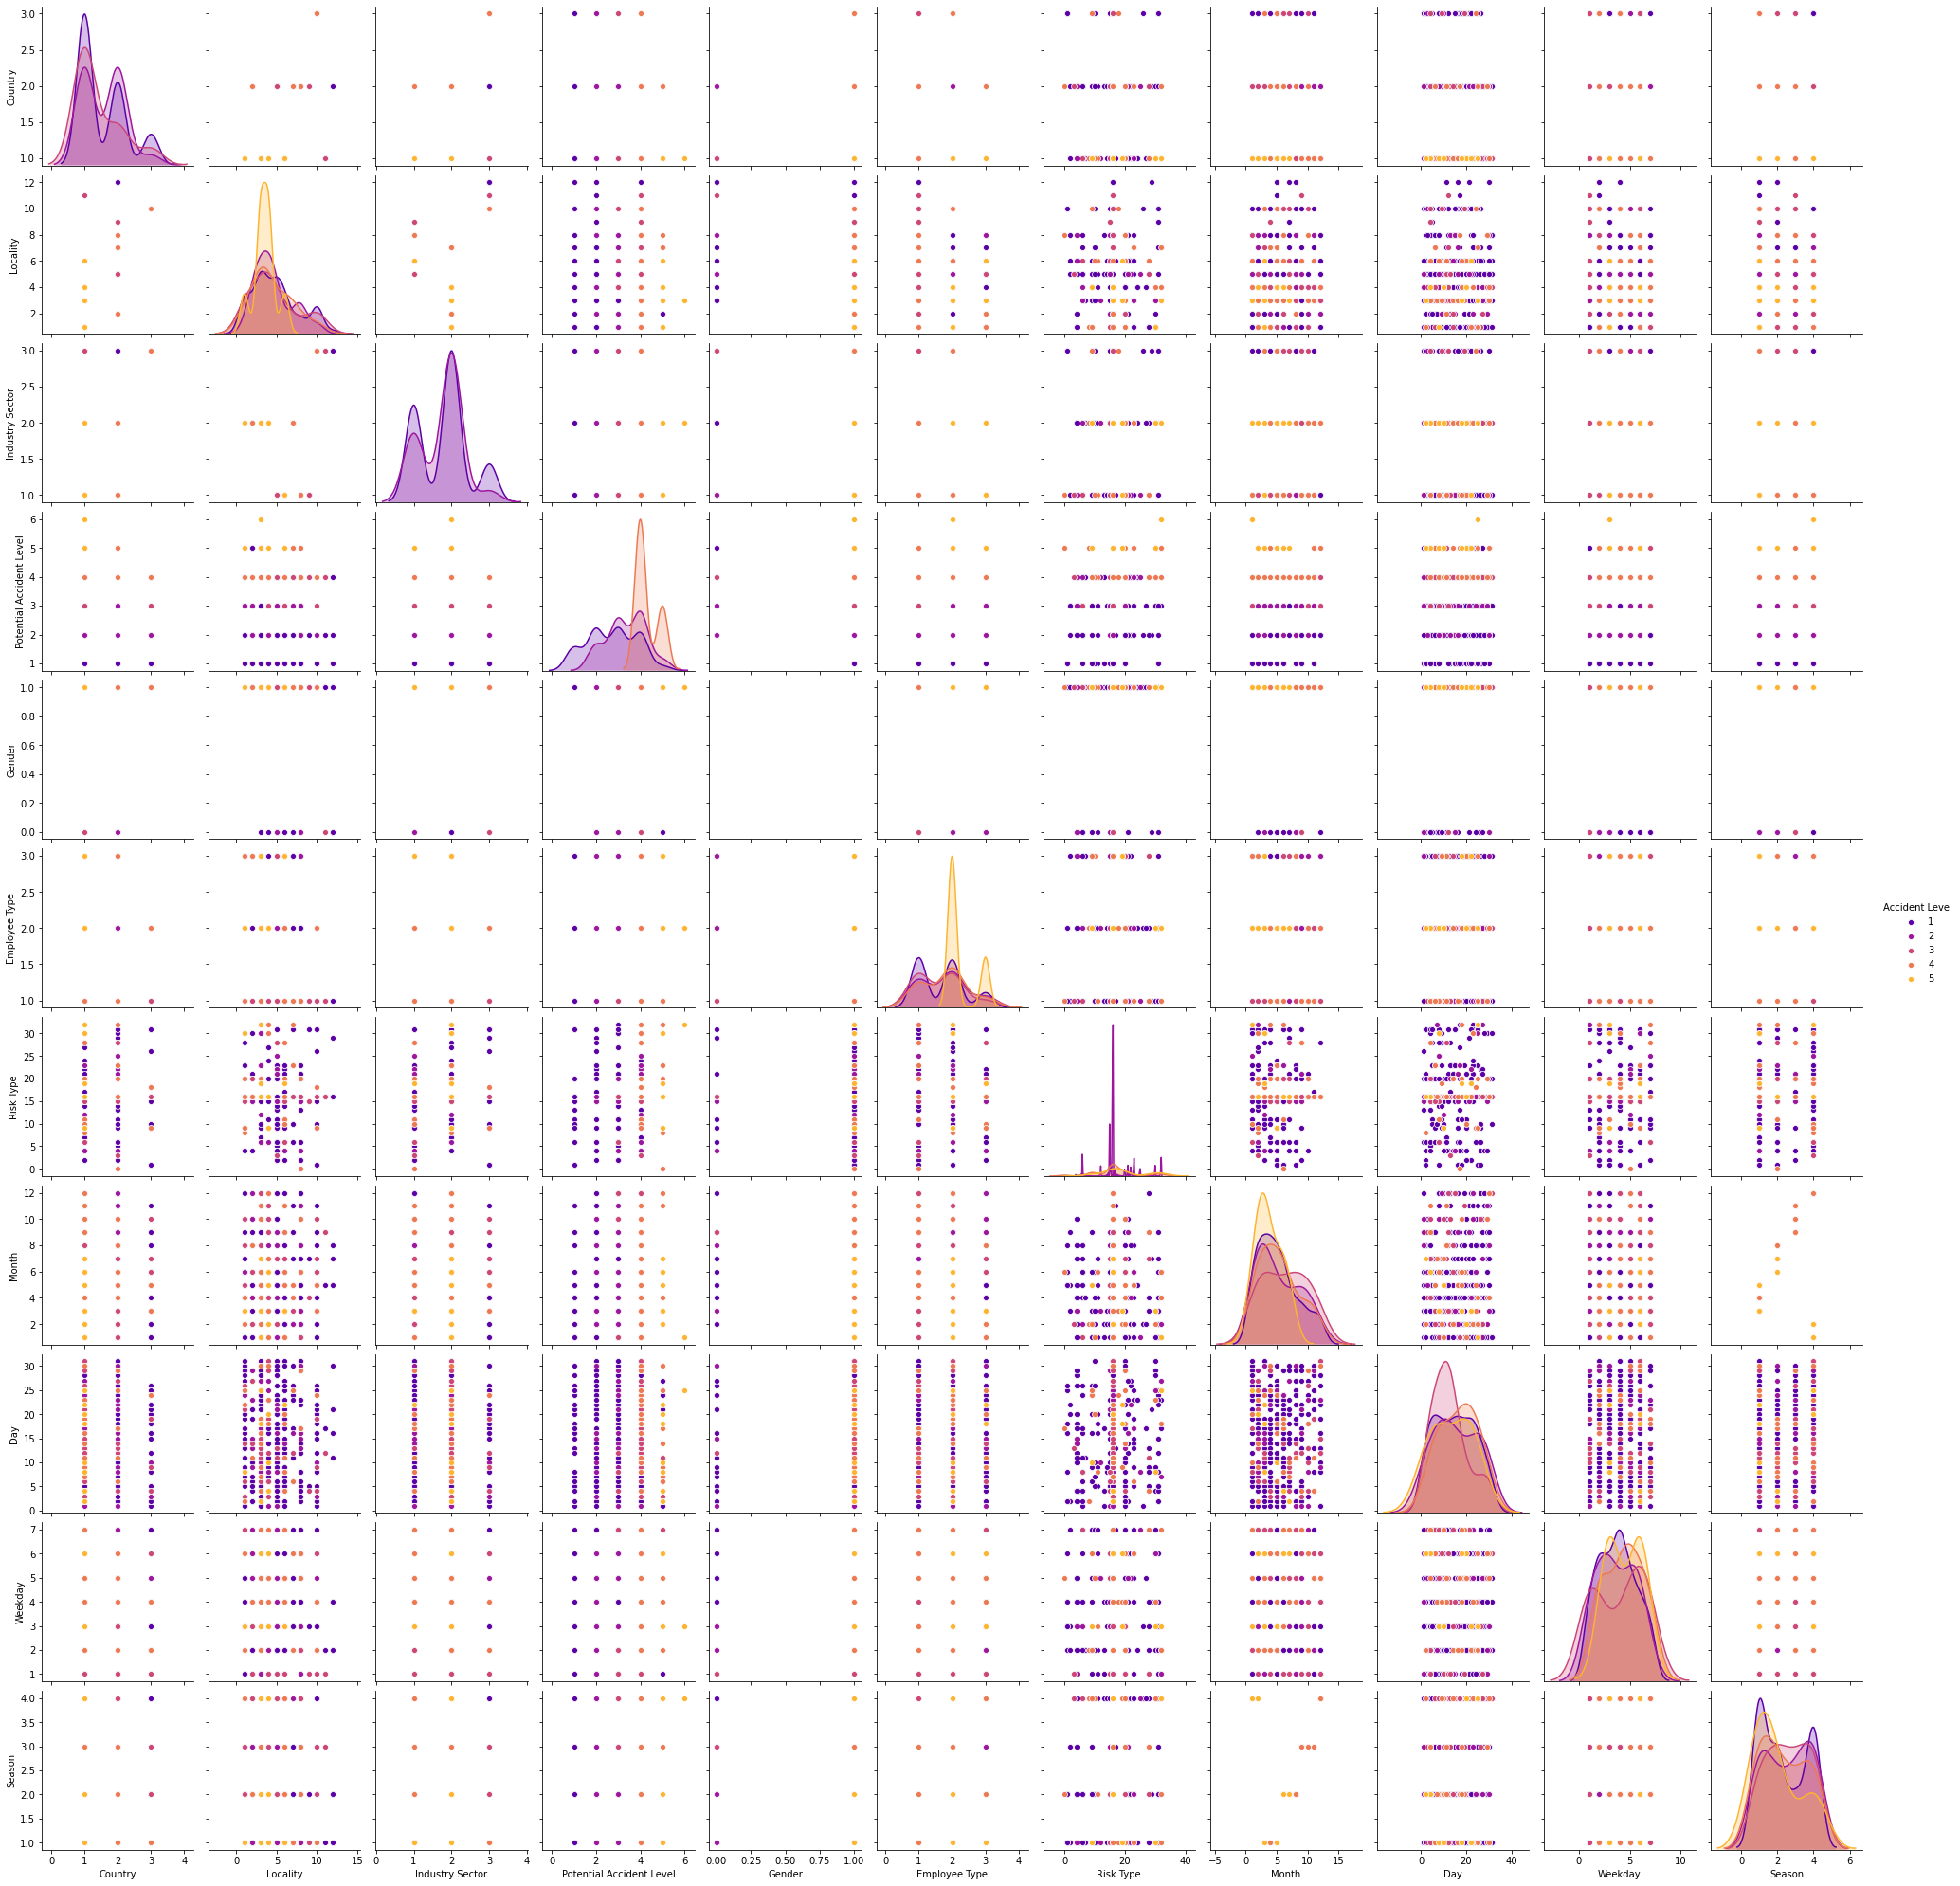

In [45]:
plt.figure(dpi=120)
sns.pairplot(df_accidents_plot, hue='Accident Level', diag_kind='kde', palette = 'plasma')
plt.show()

<Figure size 720x480 with 0 Axes>

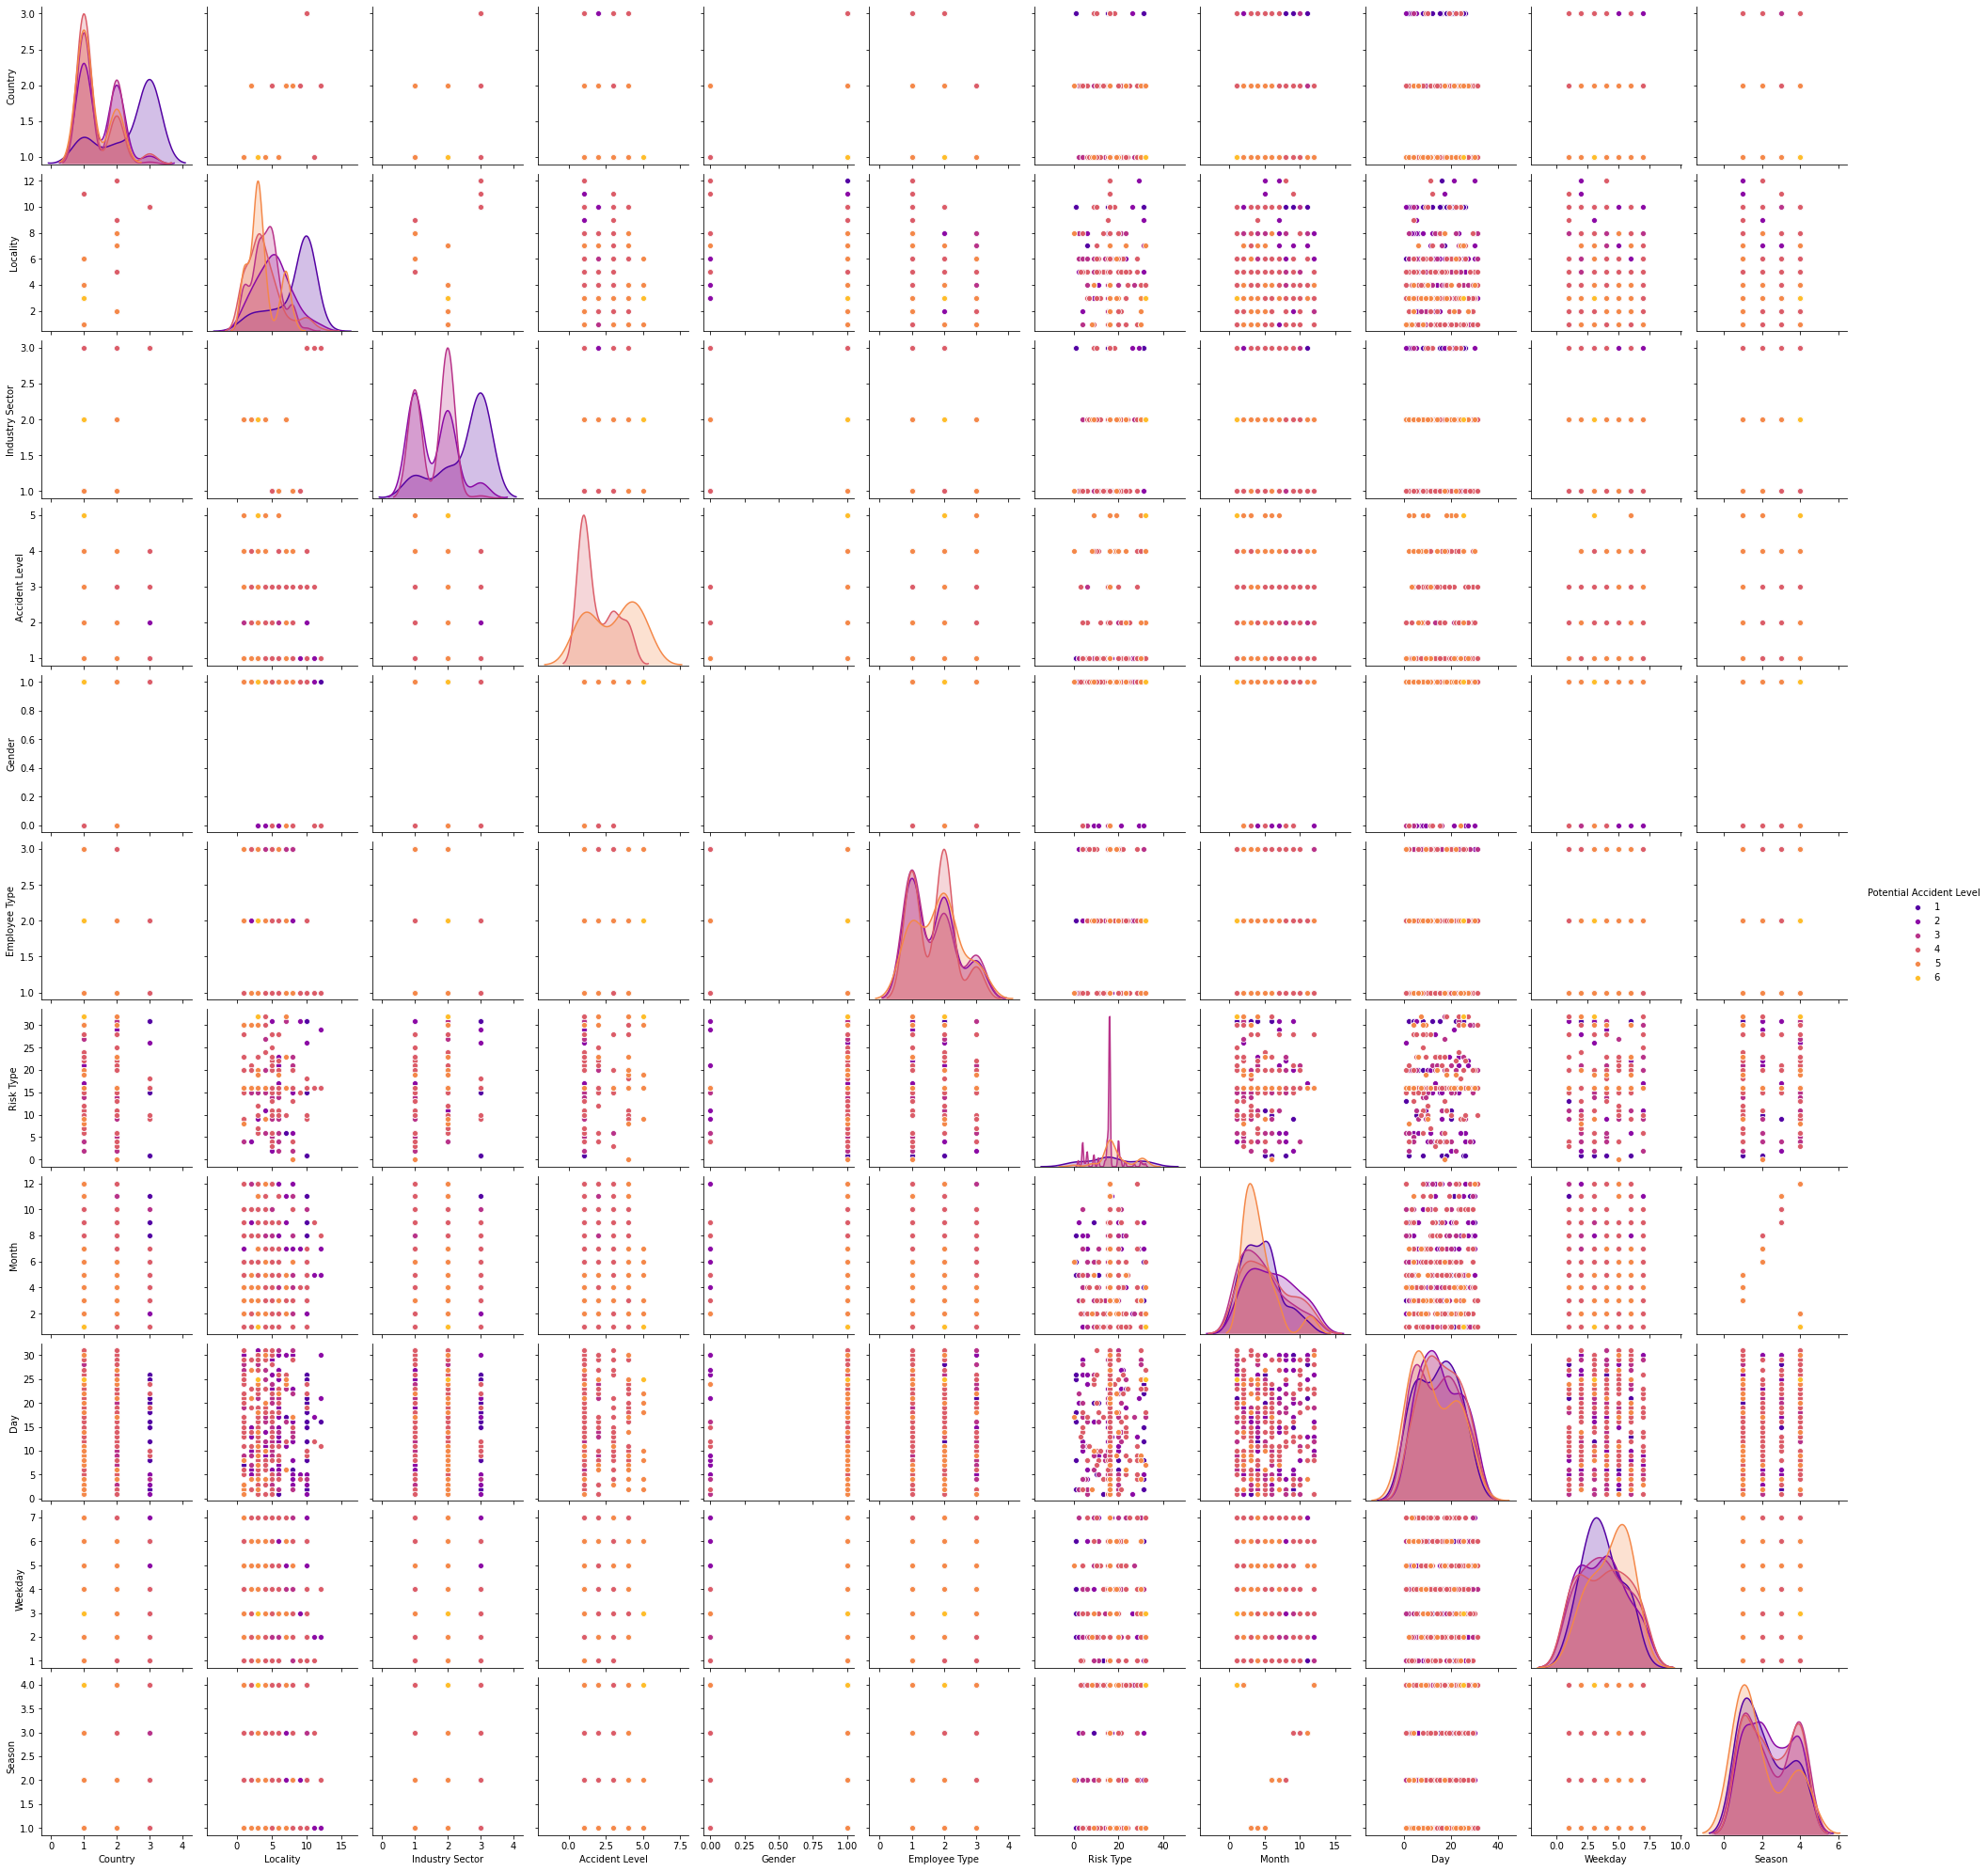

In [46]:
plt.figure(dpi=120)
sns.pairplot(df_accidents_plot, hue='Potential Accident Level', diag_kind='kde', palette = 'plasma')
plt.show()

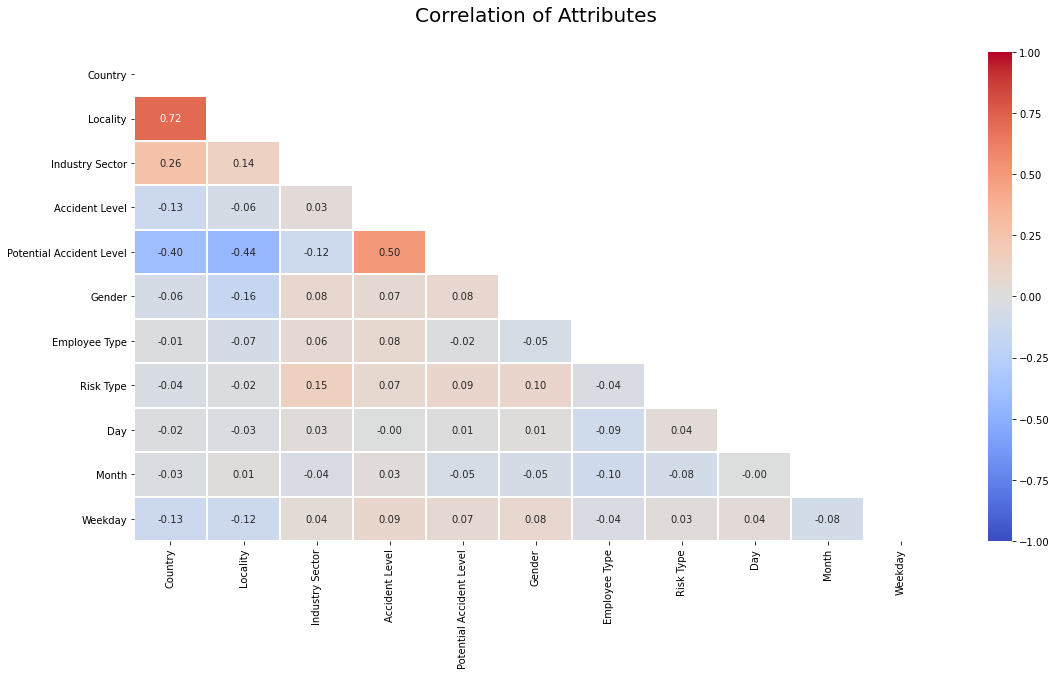

In [47]:
corr = df_accidents_plot.loc[:, ['Country', 'Locality', 'Industry Sector', 'Accident Level', 
                                       'Potential Accident Level', 'Gender', 'Employee Type', 
                                       'Risk Type', 'Day', 'Month', 'Weekday']].corr()
mask = np.triu(corr)
plt.figure(figsize = (18,9))
plt.title('Correlation of Attributes', y=1.05, size=20)
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', mask=mask, 
            vmax=1.0, vmin=-1.0, linewidths=1, linecolor = 'white')
#sns.heatmap()
plt.show()


##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
    <li>Country and Local looks more correlated</li>
</ul>
</font>
<br>

<function matplotlib.pyplot.show(*args, **kw)>

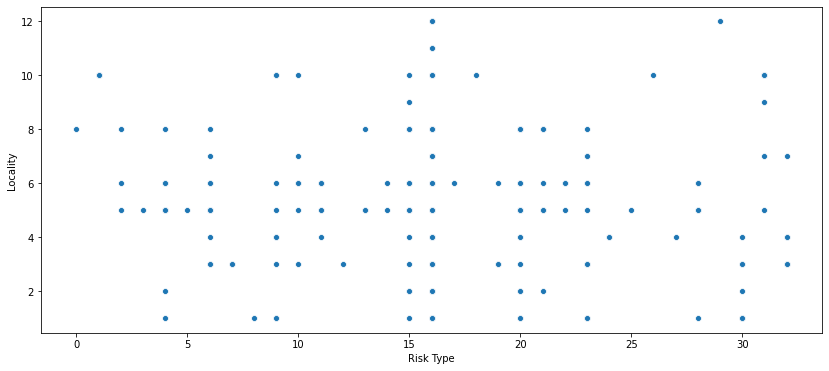

In [48]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df_accidents_plot, x="Risk Type", y="Locality")
plt.show

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Summary :
<font color=darkblue>
<ol>
    <li>Country_01 recorded the highest (59.1%) number of accidents. This is not necessarily significant as the employees in Country_01 could be more than other two Countries</li>
    <li>Male Gender recorded 94.8% of accidents compared to Female Gender with 5.2%, with no gender ratio of overall employees, this may not be significant. Could be number of Male employees are mouch more than Female employees</li>
    <li>54.6% of the accidents fall in Others category of Critical Risk, this could be due to limitations on valid options on data input/collection</li>
    <li>Third Party (44.5%) and Employee (42.1%) are prone to overall 87% of accidents</li>
    <li>Of the 12 Localities(cities), 3 localities (Local_09, Local_11 and Local_12) record very low accidents compared to other Localities. Could be these Localities have highly safe workspace. Or there could be lesser number of employees in these localities. Possibility of no proper reporting of accidents in these Localities</li>
    <li>Accident Level categorized to 6 Levels (I to VI), with I as 'not severe' and VI as 'very severe'. No acidents reported under Level VI. Level V (8) is reported with least number of accidents and 75% of accidents reported under Level I</li>
    <li>Potential Accident Level categorized to 6 Levels (I to VI), with I as 'not severe' and VI as 'very severe'. 1 accident reported under Level VI and Level IV (143) is reported with more number of accidents</li>
    <li>Months of February, March, April and June record the most accidents and Thursday record the highest number of accidents</li>
</ol>
</font>
<br>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">NLP Preprocessing :
<font color=darkblue>
</font>

In [49]:
def nlp_preprocesser(row):
    sentence = row.Description
    #convert all characters to lowercase
    lowered = sentence.lower()
    tok = tokenize.word_tokenize(lowered)

    #lemmatizing & stemming
    lemmatizer = stem.WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(i) for i in tok if i not in STOPWORDS]
    stemmer = stem.PorterStemmer()
    stems = [stemmer.stem(i) for i in lem if i not in STOPWORDS]

    #remove non-alphabetical characters like '(', '.' or '!'
    alphas = [i for i in stems if i.isalpha() and (i not in STOPWORDS)]
    return " ".join(alphas)



In [50]:
df_accidents_clean['Description_clean'] = df_accidents_clean.apply(nlp_preprocesser, axis=1)
df_accidents_clean.head(3)

,Date,Country,Locality,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Risk Type,Description,Year,Month,Day,Weekday,WeekofYear,MonthName,Season,Description_clean
0,2016-01-01,1,1,2,1,4,1,2,20,While removing the drill rod of the Jumbo 08 f...,2016,1,1,5,53,January,4,remov drill rod jumbo mainten supervisor proce...
1,2016-01-02,2,2,2,1,4,1,1,21,During the activation of a sodium sulphide pum...,2016,1,2,6,53,January,4,activ sodium sulphid pump pipe uncoupl sulfid ...
2,2016-01-06,1,3,2,1,3,1,3,15,In the sub-station MILPO located at level +170...,2016,1,6,3,1,January,4,milpo locat level collabor excav work pick han...


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis on Description:
<font color=darkblue>
</font>

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Number of Words in each Description (row):
<font color=darkblue>
</font>

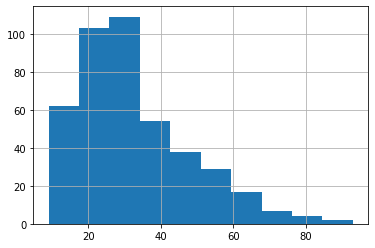

In [51]:
df_accidents_clean['Description_clean'].str.split().map(lambda x: len(x)).hist()

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Number of Characters in each Description (row):
<font color=darkblue>
</font>

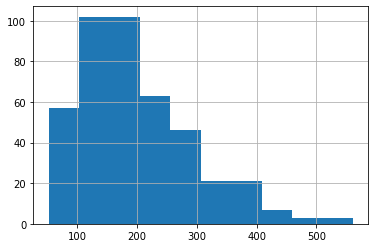

In [52]:
df_accidents_clean['Description_clean'].str.len().hist()

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Average Word length:
<font color=darkblue>
</font>

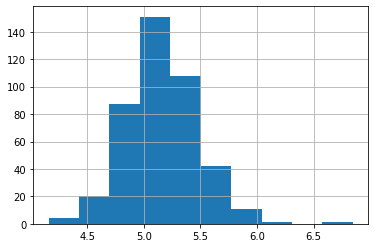

In [53]:
df_accidents_clean['Description_clean'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Stopword Average:
<font color=darkblue>
</font>

In [54]:
from nltk.corpus import stopwords

def plot_top_stopwords(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)


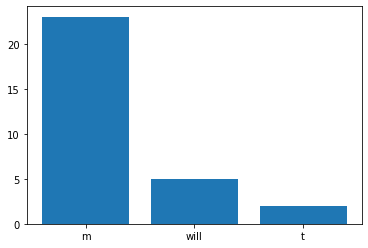

In [55]:
plot_top_stopwords(df_accidents_clean['Description_clean'])    

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis on N-Grams:
<font color=darkblue>
</font>

In [56]:
def gen_ngram(ngram, top_count=10, col='', col_value=''):
    if (col == '') or (col_value == ''):
        string_filterd =  df_accidents_clean['Description_clean'].sum().split()
    else:
        string_filterd =  df_accidents[df_accidents[col].isin(col_value)]['Description_clean'].sum().split()
    dic = nltk.FreqDist(nltk.ngrams(string_filterd, ngram)).most_common(30)
    ngram_df = pd.DataFrame(dic, columns=['ngram','count'])
    ngram_df['ngram'] = [' '.join(i) for i in ngram_df.ngram]
    #ngram_df.index = [' '.join(i) for i in ngram_df.ngram]
    #ngram_df.drop('ngram',axis=1, inplace=True)
    return ngram_df[:top_count]


In [57]:
def plot_ngram(ngram=2, top_count=10, col='', col_value=''):
    x = gen_ngram(ngram, top_count, col, col_value)
    y = x['count']
    x = x['ngram']
    
    if ngram == 1:
        aTitle = 'Top ' + str(top_count) + ' Unigram Count'
    elif ngram == 2:
        aTitle = 'Top ' + str(top_count) + ' Bigram Count'
    elif ngram == 3:
        aTitle = 'Top ' + str(top_count) + ' Trigram Count'
    else:
        aTitle = 'Top ' + str(top_count) + ' Bigram Count'
    
    plt.figure(figsize=(12,5))
    plt.title(aTitle, fontsize=14)
    ax = sns.barplot(x=y,y=x)
    plt.show()
   

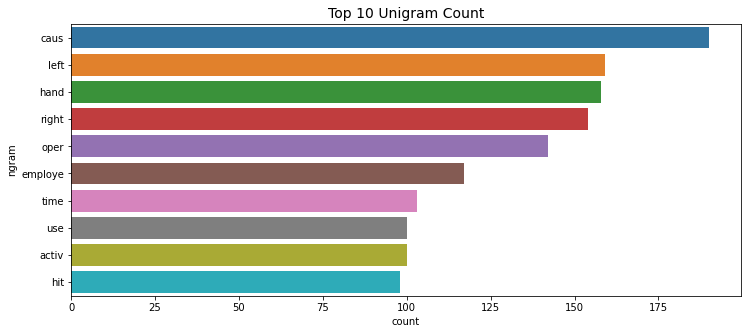

In [58]:
# Unigram
plot_ngram(1,10)

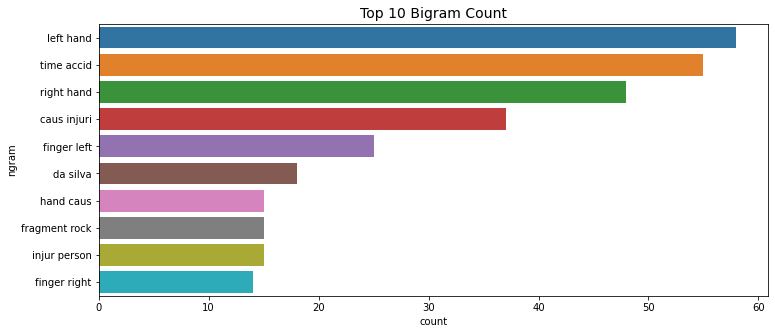

In [59]:
# Bigram
plot_ngram(2,10)

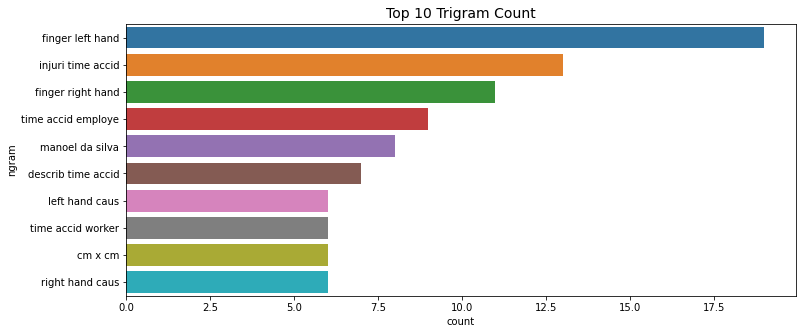

In [60]:
# Trugram
plot_ngram(3,10)

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Bigram with Accident Level:
<font color=darkblue>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Bigram with Potential Accident Level:
<font color=darkblue>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis on WordCloud:
<font color=darkblue>
</font>

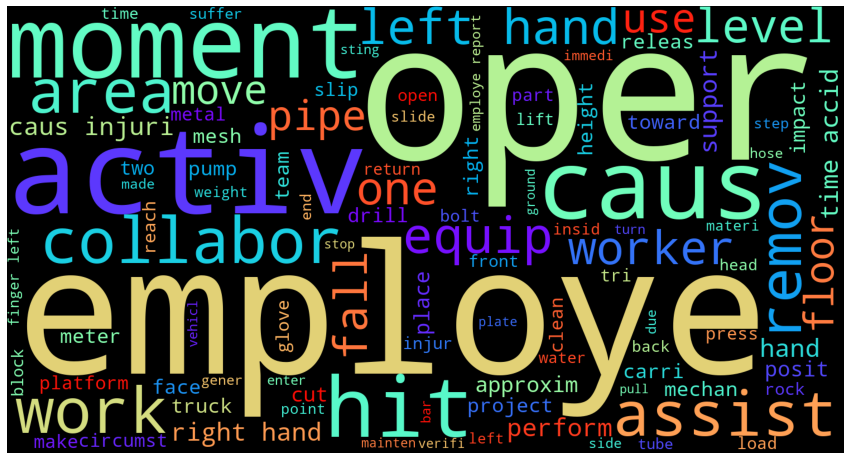

In [61]:
wordcloud = WordCloud(width = 1500, height = 800, random_state=101, background_color='black', 
                      colormap='rainbow', min_font_size=15, max_words=100, min_word_length=3, 
                      stopwords = STOPWORDS).generate(" ".join(df_accidents_clean['Description_clean'].values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Modeling :
<font color=darkblue>
</font>